In [ ]:
!pip install numpy

In [ ]:
import numpy as np

In [ ]:
!pip install pandas


In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
!pip install statsmodels


In [33]:
import tensorflow as ts
print(ts.__version__)

2.13.0


In [38]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from datetime import datetime  
import tensorflow as tf 
from statsmodels.tsa.stattools import adfuller  
from sklearn.preprocessing import MinMaxScaler  
from tensorflow import keras  
from keras import callbacks  
from tensorflow.keras import Sequential  
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional  
from tensorflow.keras.optimizers import SGD  
import math  
from sklearn.metrics import mean_squared_error  
  
import warnings  
warnings.filterwarnings("ignore") 


In [32]:
dataset = pd.read_csv(r'C:\Users\Anandita\OneDrive\Documents\traffic.csv')  
dataset.head() 

,DateTime,Junction,Vehicles,ID
0,01-11-2015 00:00,1,15,20151101001
1,01-11-2015 01:00,1,13,20151101011
2,01-11-2015 02:00,1,10,20151101021
3,01-11-2015 03:00,1,7,20151101031
4,01-11-2015 04:00,1,9,20151101041


In [10]:
dataset["DateTime"]= pd.to_datetime(dataset["DateTime"],format='mixed')  
dataset = dataset.drop(["ID"], axis=1) #dropping IDs column  
dataset.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


Text(0.5, 0, 'Date')

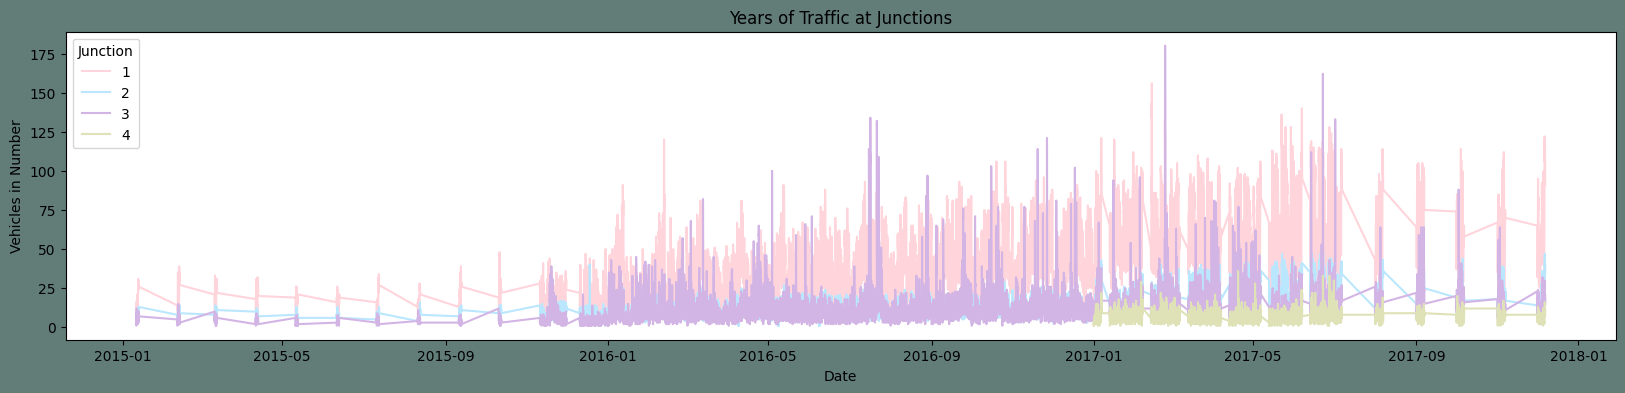

In [11]:
# dataframe to be used for EDA  
dataframe=dataset.copy()  
  
# Let's plot the Timeseries  
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]  
plt.figure(figsize=(20,4),facecolor="#627D78")  
Time_series=sns.lineplot(x=dataframe['DateTime'],y="Vehicles",data=dataframe, hue="Junction", palette=colors)  
Time_series.set_title("Years of Traffic at Junctions")  
Time_series.set_ylabel("Vehicles in Number")  
Time_series.set_xlabel("Date")  

In [12]:
# Exploring more features  
dataframe["Year"]= dataframe['DateTime'].dt.year  
dataframe["Month"]= dataframe['DateTime'].dt.month  
dataframe["Date_no"]= dataframe['DateTime'].dt.day  
dataframe["Hour"]= dataframe['DateTime'].dt.hour  
dataframe["Day"]= dataframe.DateTime.dt.strftime("%A")  
dataframe.head()  

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-01-11 00:00:00,1,15,2015,1,11,0,Sunday
1,2015-01-11 01:00:00,1,13,2015,1,11,1,Sunday
2,2015-01-11 02:00:00,1,10,2015,1,11,2,Sunday
3,2015-01-11 03:00:00,1,7,2015,1,11,3,Sunday
4,2015-01-11 04:00:00,1,9,2015,1,11,4,Sunday


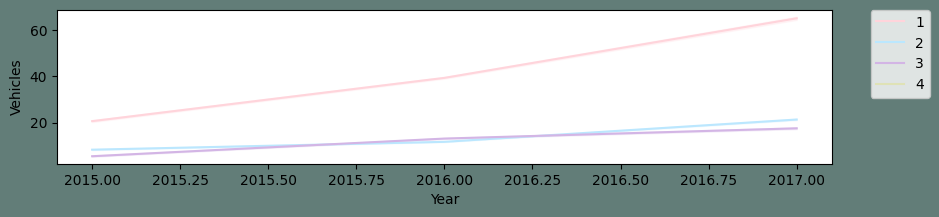

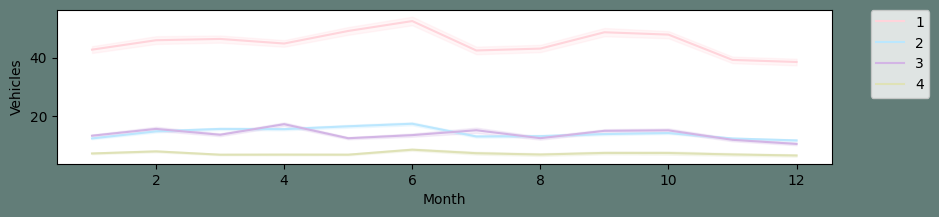

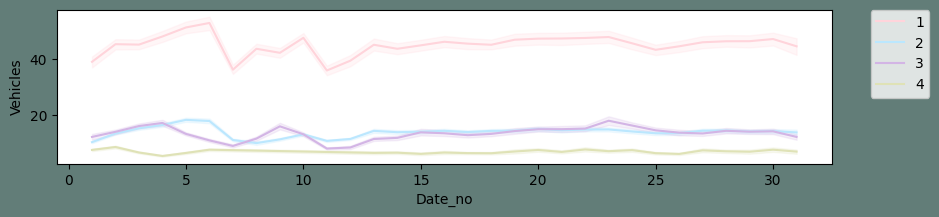

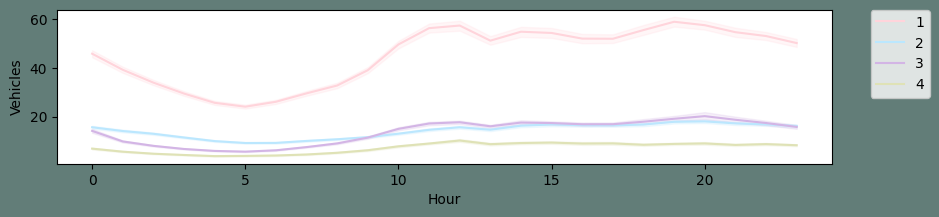

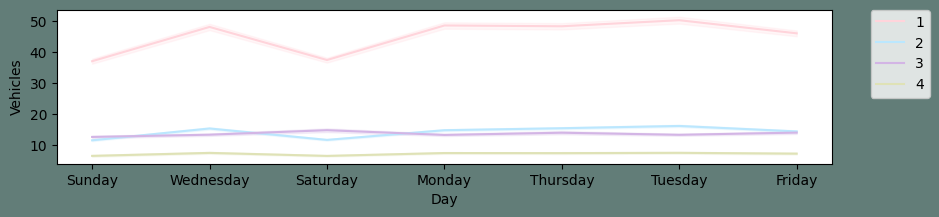

In [13]:
# Let's plot the Timeseries  
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]  
  
for i in new_features:  
    plt.figure(figsize=(10,2),facecolor="#627D78")  
    ax=sns.lineplot(x=dataframe[i],y="Vehicles",data=dataframe, hue="Junction", palette=colors )  
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  

Text(0.5, 0, 'Date')

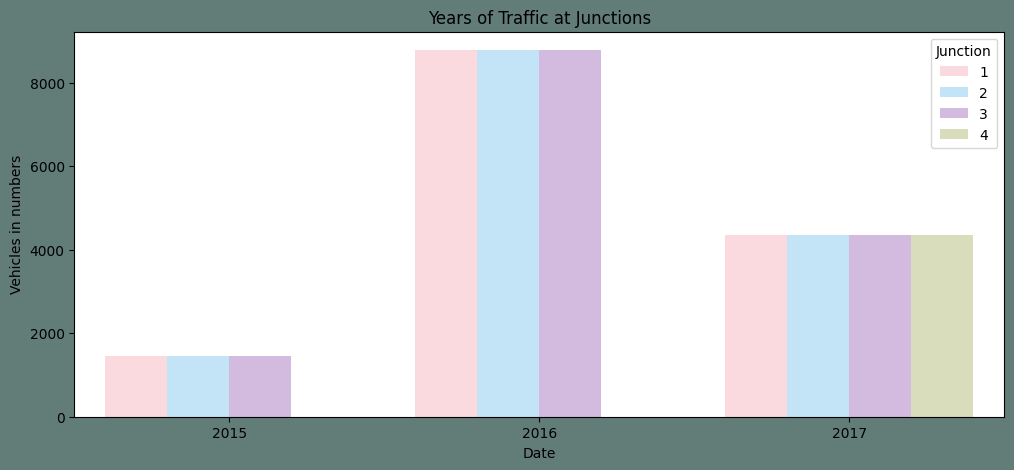

In [14]:
plt.figure(figsize=(12,5),facecolor="#627D78")  
count = sns.countplot(data=dataframe, x =dataframe["Year"], hue="Junction", palette=colors)  
count.set_title("Years of Traffic at Junctions")  
count.set_ylabel("Vehicles in numbers")  
count.set_xlabel("Date") 

<Axes: >

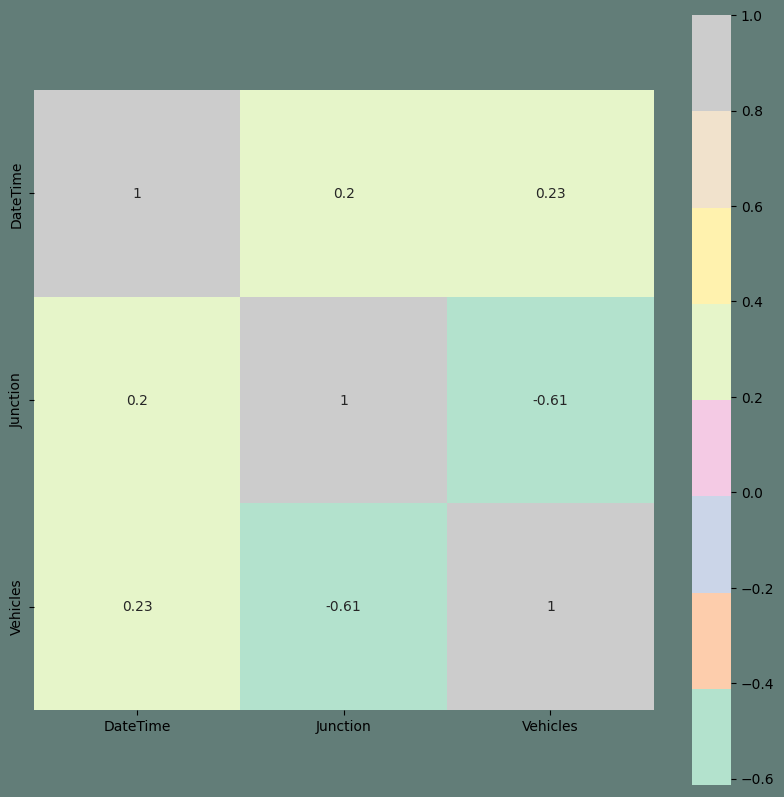

In [28]:

corrmat = dataframe.corr()  
plt.subplots(figsize=(10,10),facecolor="#627D78")  
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True, ) 

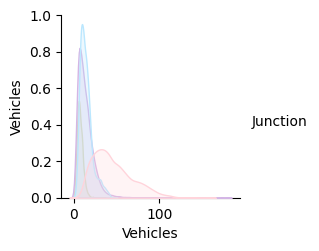

In [34]:
import seaborn as sns
sns.pairplot(data=dataframe, hue= "Junction",palette=colors)  

In [35]:
# Pivoting dataset from junction  
dataframe_junction = dataset.pivot(columns="Junction", index="DateTime")  
dataframe_junction.describe() 

Vehicles                                                     ID  \
Junction             1             2             3            4             1   
count     14592.000000  14592.000000  14592.000000  4344.000000  1.459200e+04   
mean         45.052906     14.253221     13.694010     7.251611  2.016260e+10   
std          23.008345      7.401307     10.436005     3.521455  5.779594e+06   
min           5.000000      1.000000      1.000000     1.000000  2.015110e+10   
25%          27.000000      9.000000      7.000000     5.000000  2.016038e+10   
50%          40.000000     13.000000     11.000000     7.000000  2.016083e+10   
75%          59.000000     17.000000     18.000000     9.000000  2.017013e+10   
max         156.000000     48.000000    180.000000    36.000000  2.017063e+10   

                                                    
Junction             2             3             4  
count     1.459200e+04  1.459200e+04  4.344000e+03  
mean      2.016260e+10  2.016260e+10  2.017037e+10  
std       5.779594e+06  5.779594e+06  1.712987e+05  
min       2.015110e+10  2.015110e+10  2.017010e+10  
25%       2.016038e+10  2.016038e+10  2.017022e+10  
50%       2.016083e+10  2.016083e+10  2.017040e+10  
75%       2.017013e+10  2.017013e+10  2.017052e+10  
max       2.017063e+10  2.017063e+10  2.017063e+10

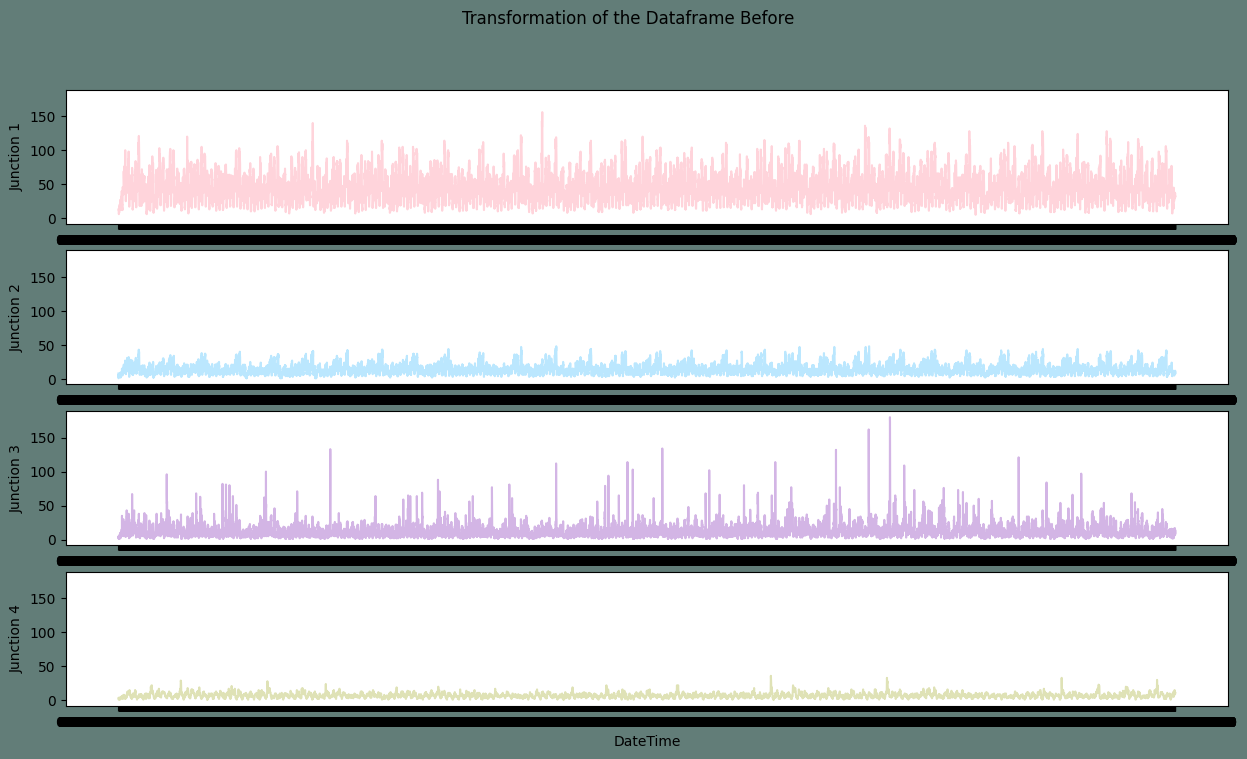

In [36]:
# Creating new dataframes  
dataframe_1 = dataframe_junction[[('Vehicles', 1)]]  
dataframe_2 = dataframe_junction[[('Vehicles', 2)]]  
dataframe_3 = dataframe_junction[[('Vehicles', 3)]]  
dataframe_4 = dataframe_junction[[('Vehicles', 4)]]  
dataframe_4 = dataframe_4.dropna() #For only a few months, Junction 4 has only had minimal data.  
  
# As DFS's data frame contains many indices, its index is lowering level one.  
list_dfs = [dataframe_1, dataframe_2, dataframe_3, dataframe_4]  
for i in list_dfs:  
    i.columns= i.columns.droplevel(level=1)    
  
# Creates comparison dataframe charts using this function  
def Sub_Plots4(dataframe_1, dataframe_2,dataframe_3,dataframe_4,title):  
    fig, axes = plt.subplots(4, 1, figsize=(15, 8),facecolor="#627D78", sharey=True)  
    fig.suptitle(title)  
    #J1  
    pl_1=sns.lineplot(ax=axes[0],data=dataframe_1,color=colors[0])  
    #pl_1=plt.ylabel()  
    axes[0].set(ylabel ="Junction 1")  
    #J2  
    pl_2=sns.lineplot(ax=axes[1],data=dataframe_2,color=colors[1])  
    axes[1].set(ylabel ="Junction 2")  
    #J3  
    pl_3=sns.lineplot(ax=axes[2],data=dataframe_3,color=colors[2])  
    axes[2].set(ylabel ="Junction 3")  
    #J4  
    pl_4=sns.lineplot(ax=axes[3],data=dataframe_4,color=colors[3])  
    axes[3].set(ylabel ="Junction 4")  
     
     
# It is displayed to test for stationarity.  
Sub_Plots4(dataframe_1.Vehicles, dataframe_2.Vehicles,dataframe_3.Vehicles,dataframe_4.Vehicles,"Transformation of the Dataframe Before") 

In [20]:
# Normalize Function  
def Normalize(dataframe,column):  
    average = dataframe[column].mean()  
    stdev = dataframe[column].std()  
    df_normalized = (dataframe[column] - average) / stdev  
    df_normalized = df_normalized.to_frame()  
    return df_normalized, average, stdev  
  
# Differencing Function  
def Difference(dataframe,column, interval):  
    diff = []  
    for i in range(interval, len(dataframe)):  
        value = dataframe[column][i] - dataframe[column][i - interval]  
        diff.append(value)  
    return diff  

In [21]:
# In order to make the series stationary, normalize and differ  
dataframe_N1, avg_J1, std_J1 = Normalize(dataframe_1, "Vehicles")  
Diff_1 = Difference(dataframe_N1, column="Vehicles", interval=(24*7)) #taking a week's difference  
dataframe_N1 = dataframe_N1[24*7:]  
dataframe_N1.columns = ["Norm"]  
dataframe_N1["Diff"]= Diff_1  
  
dataframe_N2, avg_J2, std_J2 = Normalize(dataframe_2, "Vehicles")  
Diff_2 = Difference(dataframe_N2, column="Vehicles", interval=(24)) #taking a day's difference  
dataframe_N2 = dataframe_N2[24:]  
dataframe_N2.columns = ["Norm"]  
dataframe_N2["Diff"]= Diff_2  
  
dataframe_N3, avg_J3, std_J3 = Normalize(dataframe_3, "Vehicles")  
Diff_3 = Difference(dataframe_N3, column="Vehicles", interval=1) #taking an hour's difference  
dataframe_N3 = dataframe_N3[1:]  
dataframe_N3.columns = ["Norm"]  
dataframe_N3["Diff"]= Diff_3  
  
dataframe_N4, avg_J4, std_J4 = Normalize(dataframe_4, "Vehicles")  
Diff_4 = Difference(dataframe_N4, column="Vehicles", interval=1) #taking an hour's difference  
dataframe_N4 = dataframe_N4[1:]  
dataframe_N4.columns = ["Norm"]  
dataframe_N4["Diff"]= Diff_4  

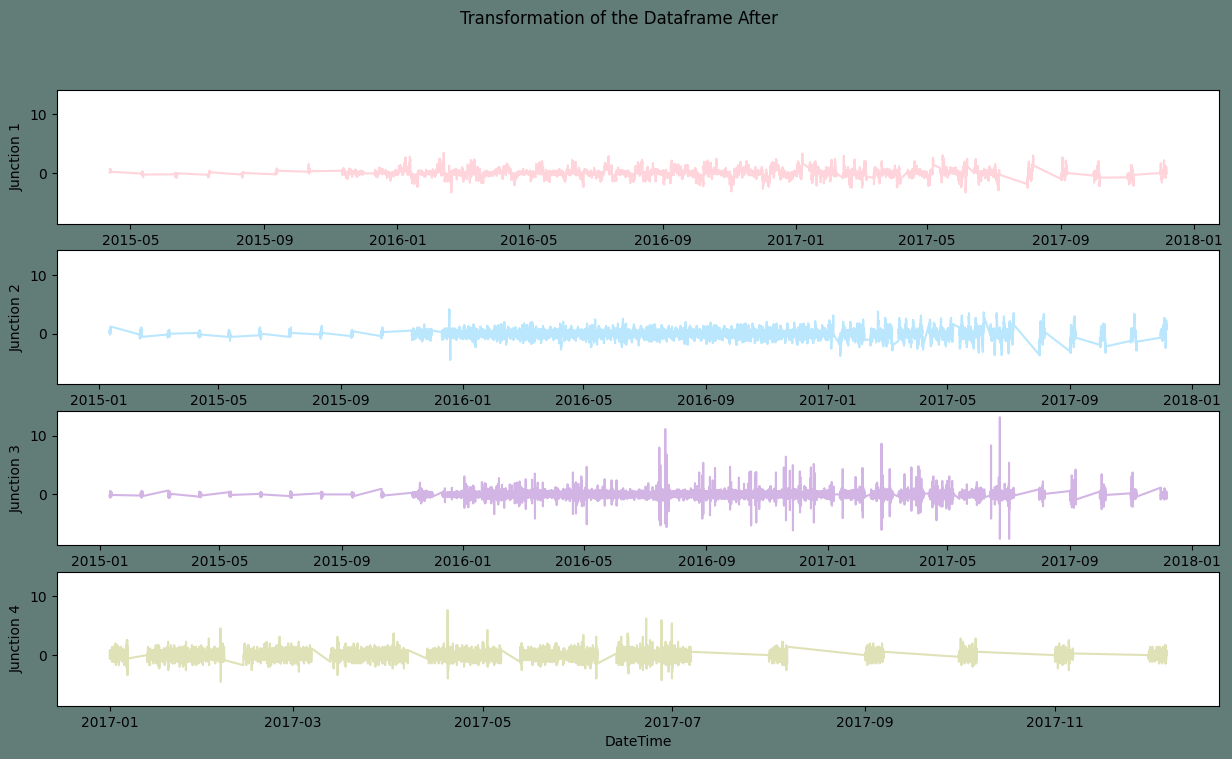

In [13]:
Sub_Plots4(dataframe_N1.Diff, dataframe_N2.Diff,dataframe_N3.Diff,dataframe_N4.Diff,"Transformation of the Dataframe After")

In [22]:
# Stationary time series check Improved Dickey-Fuller test  
def Stationary_check(dataframe):  
    check = adfuller(dataframe.dropna())  
    print(f"ADF Statistic: {check[0]}")  
    print(f"p-value: {check[1]}")  
    print("Critical Values:")  
    for key, value in check[4].items():  
        print('\t%s: %.3f' % (key, value))  
    if check[0] > check[4]["1%"]:  
        print("Time Series is Non-Stationary")  
    else:  
        print("Time Series is Stationary")  
   
  
# examining the series' stationary state  
  
List_df_ND = [ dataframe_N1["Diff"], dataframe_N2["Diff"], dataframe_N3["Diff"], dataframe_N4["Diff"]]  
print("Checking the transformed series for stationarity:")  
for i in List_df_ND:  
    print("\n")  
    Stationary_check(i)  

Checking the transformed series for stationarity:


ADF Statistic: -15.100540817208104
p-value: 7.95233279781974e-28
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -22.716779111209714
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -28.261843803995795
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -16.183692640792373
p-value: 4.2405309090558407e-29
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Time Series is Stationary


In [24]:
# Several NA values were produced as a result of differencing using a week's worth of data.  
dataframe_J1 = dataframe_N1["Diff"].dropna()  
dataframe_J1 = dataframe_J1.to_frame()  
  
dataframe_J2 = dataframe_N2["Diff"].dropna()  
dataframe_J2 = dataframe_J2.to_frame()  
  
dataframe_J3 = dataframe_N3["Diff"].dropna()  
dataframe_J3 = dataframe_J3.to_frame()  
  
dataframe_J4 = dataframe_N4["Diff"].dropna()  
dataframe_J4 = dataframe_J4.to_frame()  
  
# Splitting the dataset  
def Split_data(dataframe):  
    training_size = int(len(dataframe)*0.90)  
    data_len = len(dataframe)  
    train, test = dataframe[0:training_size],dataframe[training_size:data_len]  
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)  
    return train, test  
# Splitting the training and test datasets  
Junction1_train, Junction1_test = Split_data(dataframe_J1)  
Junction2_train, Junction2_test = Split_data(dataframe_J2)  
Junction3_train, Junction3_test = Split_data(dataframe_J3)  
Junction4_train, Junction4_test = Split_data(dataframe_J4)  
  
# Target and Feature  
def target_and_feature(dataframe):  
    end_len = len(dataframe)  
    X = []  
    y = []  
    steps = 32  
    for i in range(steps, end_len):  
        X.append(dataframe[i - steps:i, 0])  
        y.append(dataframe[i, 0])  
    X, y = np.array(X), np.array(y)  
    return X ,y  
  
# fixing the shape of X_test and X_train  
def FeatureFixShape(train, test):  
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))  
    test = np.reshape(test, (test.shape[0],test.shape[1],1))  
    return train, test  
  
# Assigning features and target  
X_train_Junction1, y_train_Junction1 = target_and_feature(Junction1_train)  
X_test_Junction1, y_test_Junction1 = target_and_feature(Junction1_test)  
X_train_Junction1, X_test_Junction1 = FeatureFixShape(X_train_Junction1, X_test_Junction1)  
  
X_train_Junction2, y_train_Junction2 = target_and_feature(Junction2_train)  
X_test_Junction2, y_test_Junction2 = target_and_feature(Junction2_test)  
X_train_Junction2, X_test_Junction2 = FeatureFixShape(X_train_Junction2, X_test_Junction2)  
  
X_train_Junction3, y_train_Junction3 = target_and_feature(Junction3_train)  
X_test_Junction3, y_test_Junction3 = target_and_feature(Junction3_test)  
X_train_Junction3, X_test_Junction3 = FeatureFixShape(X_train_Junction3, X_test_Junction3)  
  
X_train_Junction4, y_train_Junction4 = target_and_feature(Junction4_train)  
x_test_Junction4, y_test_Junction4 = target_and_feature(Junction4_test)  
X_train_Junction4, x_test_Junction4 = FeatureFixShape(X_train_Junction4, x_test_Junction4)  

In [30]:
#Model for the prediction  
def GRU_model(X_Train, y_Train, X_Test):    
     
    #The GRU model  
    model = tf.keras.Sequential()  
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
     
    model.add(GRU(units=50, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
    model.add(Dense(units=1))  
     
    # Compiling the model  
    model.compile(optimizer=SGD(decay=1e-7, momentum=0.9),loss='mean_squared_error')  
    model.fit(X_Train,y_Train, epochs=50, batch_size=150,callbacks=[early_stopping])  
    pred_GRU= model.predict(X_Test)  
    return pred_GRU  
  
# To determine the root mean squared prediction error  
def RMSE_Value(test,predicted):  
    rmse = math.sqrt(mean_squared_error(test, predicted))  
    print("The root mean squared error is {}.".format(rmse))  
    return rmse  
  
# Plotting the goal and forecast comparison plot  
def PredictionsPlot(test,predicted,m):  
    plt.figure(figsize=(12,5),facecolor="#627D78")  
    plt.plot(test, color=colors[m],label="True Value",alpha=0.5 )  
    plt.plot(predicted, color="#627D78",label="Predicted Values")  
    plt.title("GRU Traffic Prediction Vs True values")  
    plt.xlabel("DateTime")  
    plt.ylabel("Number of Vehicles")  
    plt.legend()  
    plt.show()  

In [31]:
#Predictions For First Junction  
PredJ1 = GRU_model(X_train_Junction1,y_train_Junction1,X_test_Junction1)  

ValueError: decay is deprecated in the new Keras optimizer, please check the docstring for valid arguments, or use the legacy optimizer, e.g., tf.keras.optimizers.legacy.SGD.